In [27]:
# Feature importance extraction based on a random forest
# adoptionSpeed - holds adoption speed values from df_train
# train - training data set for model evaluation (80% of df_train)
# test - testing data set for model evaluation (20% of df_train)
# adoptionSpeed_train, adoptionSpeed_test - corresponding values of the adooption speed, used for model evaluation
# feature_train - only n most important features (columns) from train 
# feature_test - only n most important features (columns) from test
# max_features - set how many features to use to create feature_train and feature_test

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# Import the model
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn import datasets, linear_model, tree
from sklearn.metrics import mean_squared_error, r2_score,roc_auc_score, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import SparsePCA, TruncatedSVD, LatentDirichletAllocation, NMF

In [2]:
# READ DATA
df_train = pd.read_csv('./final_train.csv')

In [3]:
# Remove object data types from the data

df_train.drop(df_train.select_dtypes(['object']), axis=1, inplace=True)
#df_train.info()
#df_train.describe()

# Extract adoptionSpeed in a separate variable, remove it from the data set for model training/evaluation
df_train = df_train.dropna()
adoptionSpeed=df_train['AdoptionSpeed']
del df_train["AdoptionSpeed"]
#df_train.info()

In [4]:
# Normalize the data
# Bring all your values onto one scale to eliminate sparsity by:
# Dividing by the standard deviation and substracting the mean for each data point
columns = df_train.columns
df_train = pd.DataFrame(preprocessing.scale(df_train))
df_train.columns = columns
# df_train.describe()

In [5]:
############################################################################################
############################ Feature Importance ###########################################
############################################################################################

# Separate the training data set into train (80% df_train) and test (20% df_train)
train, test, adoptionSpeed_train, adoptionSpeed_test = train_test_split(df_train, adoptionSpeed, test_size=0.2)

model = RandomForestClassifier(n_estimators=500, criterion='entropy') # n_estimators number of decision trees

# Train a random forest classifier for feature importance for all pets
model.fit(train, adoptionSpeed_train)

# Return the feature importances (the higher, the more important the feature)
importances = model.feature_importances_
std = np.std([t.feature_importances_ for t in model.estimators_],
             axis=0)
index = np.argsort(importances)[::-1]

In [6]:
# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    # print("%d. feature %d (%f)" % (f + 1, index[f], importances[index[f]]))
    print("%d. %s" % (f+1, train.columns.values[index[f]]))
    
labels = list(train.columns.values)
ordered_labels = [labels[i] for i in index]

Feature ranking:
1. RescuerID_COUNT
2. file_top_score_Mean
3. Age
4. file_color_score_Mean
5. file_color_pixelfrac_Mean
6. file_top_score_Sum
7. file_color_pixelfrac_Sum
8. domcol_b_Mean
9. domcol_r_Mean
10. file_color_score_Sum
11. img_bound_polygon_y_Mean
12. domcol_g_Mean
13. domcol_b_Sum
14. domcol_r_Sum
15. sum_mag_Mean
16. sum_score_Mean
17. domcol_g_Sum
18. sum_mag_corr_Mean
19. doc_mag_corr_Mean
20. Breed1
21. img_bound_polygon_x_Mean
22. img_bound_polygon_x_Sum
23. img_bound_polygon_y_Sum
24. sent_count_Mean
25. sen1_score_Mean
26. sen1_magnitude_Mean
27. doc_score_Mean
28. Color2
29. Color1
30. Sterilized
31. State
32. Breed2
33. Gender
34. img_imp_fract_Sum
35. FurLength
36. file_crop_importance_Sum
37. Vaccinated
38. Quantity
39. Dewormed
40. MaturitySize
41. Color3
42. file_crop_conf_Sum
43. img_confidence_Sum
44. Fee
45. pic_no
46. PhotoAmt
47. Type
48. file_crop_importance_Mean
49. img_imp_fract_Mean
50. img_confidence_Mean
51. file_crop_conf_Mean
52. VideoAmt
53. Health

Plotting feature importances


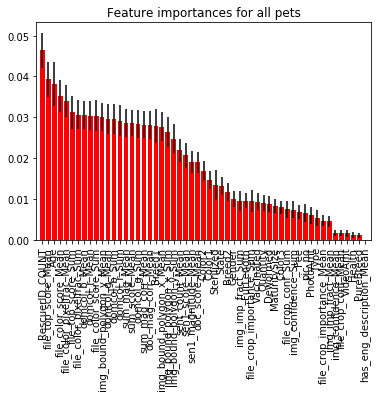

In [7]:
# Plot the feature importances of the forest
print("Plotting feature importances")
fig, ax = plt.subplots()
fig.canvas.draw()
plt.title("Feature importances for all pets")
plt.bar(range(train.shape[1]), importances[index],
       color="r", yerr=std[index], align="center")
plt.xticks(range(train.shape[1]), index, rotation='vertical')
plt.xlim([-1, train.shape[1]])
ax.set_xticklabels(ordered_labels)
plt.show()

In [20]:

# Retrain the model on best settings
best_forest = RandomForestClassifier(n_estimators=500, criterion='entropy')

best_forest.fit(train, adoptionSpeed_train)
forest_predicted = best_forest.predict(test)


In [21]:
print(accuracy_score(adoptionSpeed_test, forest_predicted))
print(precision_score(adoptionSpeed_test, forest_predicted, average='macro'))

0.42730496453900707
0.3325615720097252


In [22]:
print(recall_score(adoptionSpeed_test, forest_predicted, average='macro'))
print(f1_score(adoptionSpeed_test, forest_predicted,average='macro'))

0.33781713882519826
0.32418000502457345


In [23]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, criterion='mse')

# Train the model on training data
rf.fit(train, adoptionSpeed_train);
forest_regr = rf.predict(test)

In [31]:
print(mean_squared_error(adoptionSpeed_test, forest_regr))
print(r2_score(adoptionSpeed_test, forest_regr))

1.098774335106383
0.1790992789551189


In [32]:
clf = SVC(gamma='auto')
clf.fit(train, adoptionSpeed_train) 
svc_predict = clf.predict(test)

In [37]:
print(accuracy_score(adoptionSpeed_test, svc_predict))
print(precision_score(adoptionSpeed_test, svc_predict, labels=np.unique(svc_predict), average='macro'))

0.38687943262411345
0.3825028361525257


In [36]:
print(recall_score(adoptionSpeed_test, svc_predict, average='macro'))
print(f1_score(adoptionSpeed_test, svc_predict,labels=np.unique(svc_predict), average='macro'))

0.30474658778354186
0.364909175945121
